# Part 5: Curve Fitting

Curve fitting is a technique used in the analysis of pollution data to study the relationships between variables and make predictions or extrapolations.It helps in:

Data Smoothing: Curve fitting can be used to smooth out noisy or erratic pollution data. By fitting a curve to the data, we can remove the random fluctuations and obtain a smoother representation of the pollution levels, making it easier to identify underlying patterns or trends.

Comparative Analysis: Curve fitting allows to compare the pollution levels of different pollutants on the same scale. By fitting curves for multiple pollutants on a single plot, we can visually compare their concentrations and observe any similarities or differences in their trends over time.

Overall, curve fitting helps in understanding the patterns, trends, and relationships within the pollution data, enabling better analysis, visualization, and interpretation of the data.

Here we have plotted the air pollution data along a curve to study the relationships of variables within the data.

Also non-parametric curve fitting or fitting data via parametric distributions is explored via methods like spline interpolation, lowess regression and also fitting data  using methods like polynomial curve fitting.

In [1]:
!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd
import pandas.plotting
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


import seaborn as sns
from scipy.stats import norm
from statsmodels.graphics.gofplots import qqplot

In [3]:
file_path = 'C:/Users/Omkar/Desktop/EE798Q/Open pit blasting 01-02-2023 000000 To 01-05-2023 235959.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path , index_col=0)

In [4]:
# Simplify column names
df.columns = ['from', 'to', 'PM10', 'PM2.5', 'NO','NO2','NOX','CO','SO2','NH3','Ozone','Benzene']
df['CO']*=1000
# deleting to column as we need only one timestamp column for to be index and we choose it to be from column
df = df.drop('to', axis=1)
# removing last 3 rows as they contaion max , min , avg data instead of actual observations
df = df.iloc[:-3]
df.tail()


,from,PM10,PM2.5,NO,NO2,NOX,CO,SO2,NH3,Ozone,Benzene
#,,,,,,,,,,,
8636,2023-05-01 22:45:00,19.0,11.0,17.9,100.0,67.8,630.0,10.0,10.7,26.1,0.1
8637,2023-05-01 23:00:00,19.0,11.0,17.9,100.0,67.7,570.0,10.0,10.4,30.9,0.1
8638,2023-05-01 23:15:00,19.0,11.0,19.6,100.2,69.2,580.0,9.9,10.5,29.6,0.1
8639,2023-05-01 23:30:00,19.0,11.0,20.8,100.2,70.2,580.0,9.5,10.8,30.0,0.1
8640,2023-05-01 23:45:00,32.0,6.0,21.8,98.8,70.3,NaN,NaN,11.0,33.5,0.1


In [5]:
# conveting timestamp as a string object into a datetime numerical 
date_format = '%Y-%m-%d %H:%M:%S'

# Convert the 'from' column to numerical datetime representation
df['from'] = pd.to_datetime(df['from'], format=date_format)


In [6]:
# set datetime "from" column as an index column
df.set_index('from', inplace=True)
df.head()

,PM10,PM2.5,NO,NO2,NOX,CO,SO2,NH3,Ozone,Benzene
from,,,,,,,,,,
2023-02-01 00:00:00,95.0,35.0,NaN,90.1,56.2,310.0,NaN,17.7,28.1,0.4
2023-02-01 00:15:00,95.0,35.0,NaN,88.0,55.1,330.0,NaN,18.3,27.1,0.4
2023-02-01 00:30:00,95.0,35.0,NaN,87.7,55.2,380.0,NaN,19.7,24.9,0.4
2023-02-01 00:45:00,122.0,34.0,NaN,88.9,55.7,380.0,NaN,21.3,21.9,0.4
2023-02-01 01:00:00,122.0,34.0,NaN,90.0,55.8,380.0,NaN,22.3,16.7,0.4


In [7]:
# resample
# df = df.resample('D').mean()
# interpolating
df = df.interpolate(method='spline',order=3)
df.fillna(method='ffill', inplace=True)  # Fill missing values forward
df.fillna(method='bfill', inplace=True)  # Fill missing values backward

In [8]:
df


,PM10,PM2.5,NO,NO2,NOX,CO,SO2,NH3,Ozone,Benzene
from,,,,,,,,,,
2023-02-01 00:00:00,95.0,35.0,18.1,90.1,56.2,310.000000,8.200000,17.7,28.1,0.4
2023-02-01 00:15:00,95.0,35.0,18.1,88.0,55.1,330.000000,8.200000,18.3,27.1,0.4
2023-02-01 00:30:00,95.0,35.0,18.1,87.7,55.2,380.000000,8.200000,19.7,24.9,0.4
2023-02-01 00:45:00,122.0,34.0,18.1,88.9,55.7,380.000000,8.200000,21.3,21.9,0.4
2023-02-01 01:00:00,122.0,34.0,18.1,90.0,55.8,380.000000,8.200000,22.3,16.7,0.4
...,...,...,...,...,...,...,...,...,...,...
2023-05-01 22:45:00,19.0,11.0,17.9,100.0,67.8,630.000000,10.000000,10.7,26.1,0.1
2023-05-01 23:00:00,19.0,11.0,17.9,100.0,67.7,570.000000,10.000000,10.4,30.9,0.1
2023-05-01 23:15:00,19.0,11.0,19.6,100.2,69.2,580.000000,9.900000,10.5,29.6,0.1


In [9]:
weights=[0.398,0.166,0.032,0.123,0.094,3,0.075,0.029,0.078,0.0004]
# Define the weights for each column

In [10]:
# Calculate the weighted mean across the columns
df['tot_pol'] = (df.iloc[:, :10] * weights).sum(axis=1)

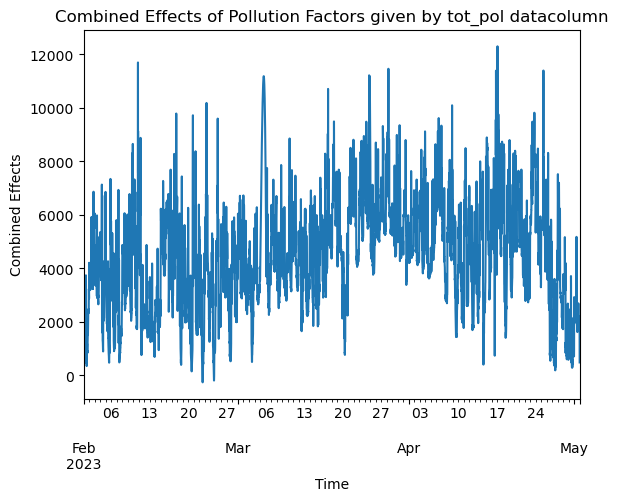

In [11]:
df['tot_pol'].plot()
plt.xlabel('Time')
plt.ylabel('Combined Effects')
plt.title('Combined Effects of Pollution Factors given by tot_pol datacolumn')
plt.show()

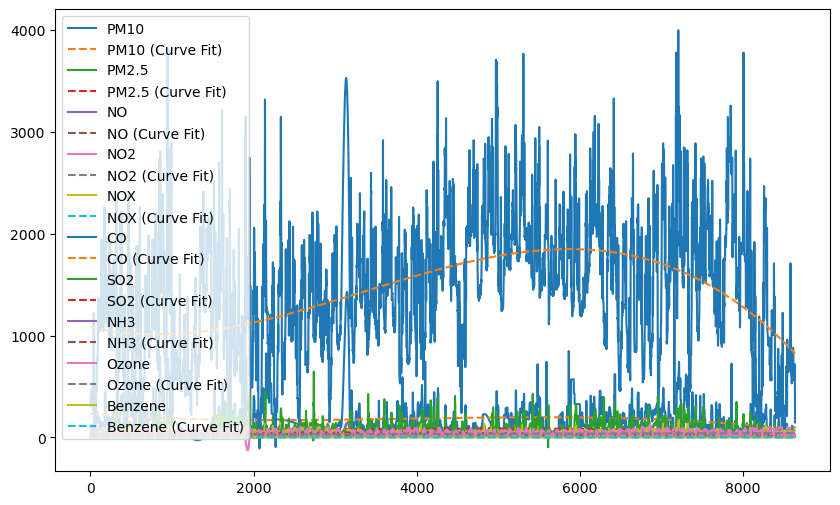

In [12]:
%matplotlib inline
from scipy.optimize import curve_fit
import matplotlib.dates as mdates

# Define the pollutants of interest
pollutants = ['PM10', 'PM2.5', 'NO', 'NO2', 'NOX', 'CO', 'SO2', 'NH3', 'Ozone', 'Benzene']

# Fit a polynomial curve for each pollutant
curve_params = {}
for pollutant in pollutants:
    x = np.arange(len(df))
    y = df[pollutant].values
    # Adjust the degree of the polynomial as needed
    degree = 3
    # Perform curve fitting
    params = np.polyfit(x, y, degree)
    curve_params[pollutant] = params

# Plot the air pollution data along the curve
fig, ax = plt.subplots(figsize=(10, 6))
for pollutant in pollutants:
    x = np.arange(len(df))
    y = df[pollutant].values
    params = curve_params[pollutant]
    y_fit = np.polyval(params, x)
    ax.plot(x, y, label=pollutant)
    ax.plot(x, y_fit, '--', label=pollutant + ' (Curve Fit)')
    plt.legend()

In this example, a polynomial curve of degree 3 is fitted to the pollutant data for each variable. 

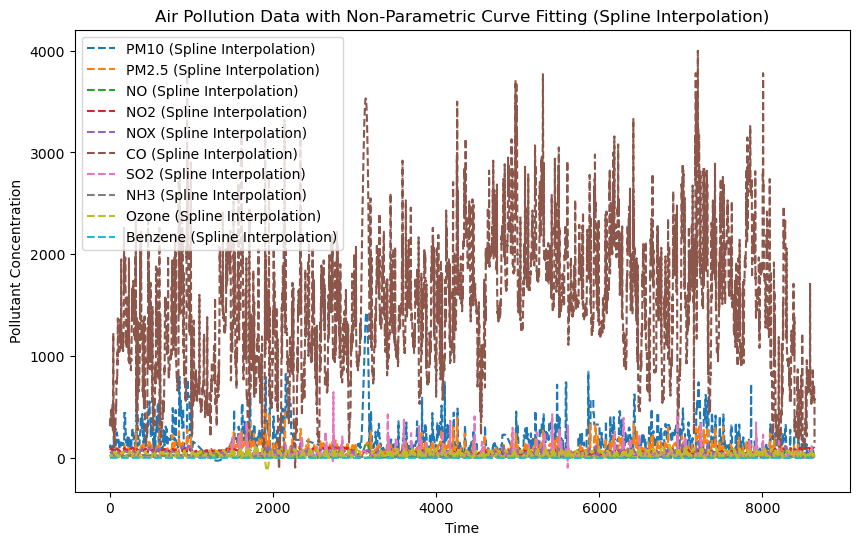

In [13]:
from scipy.interpolate import interp1d
# Define the pollutants of interest
pollutants = ['PM10', 'PM2.5', 'NO', 'NO2', 'NOX', 'CO', 'SO2', 'NH3', 'Ozone', 'Benzene']

# Fit a non-parametric curve (spline interpolation) for each pollutant
curve_data = {}
for pollutant in pollutants:
    x = np.arange(len(df))
    y = df[pollutant].values
    # Perform spline interpolation
    spline_fit = interp1d(x, y, kind='cubic')
    curve_data[pollutant] = spline_fit(x)

# Plot the air pollution data with non-parametric curve fitting
fig, ax = plt.subplots(figsize=(10, 6))
for pollutant in pollutants:
    x = np.arange(len(df))
    y = df[pollutant].values
    spline_fit = curve_data[pollutant]
#     ax.plot(x, y, label=pollutant)
    ax.plot(x, spline_fit, '--', label=pollutant + ' (Spline Interpolation)')

plt.xlabel('Time')
plt.ylabel('Pollutant Concentration')
plt.title('Air Pollution Data with Non-Parametric Curve Fitting (Spline Interpolation)')
plt.legend()
plt.show()

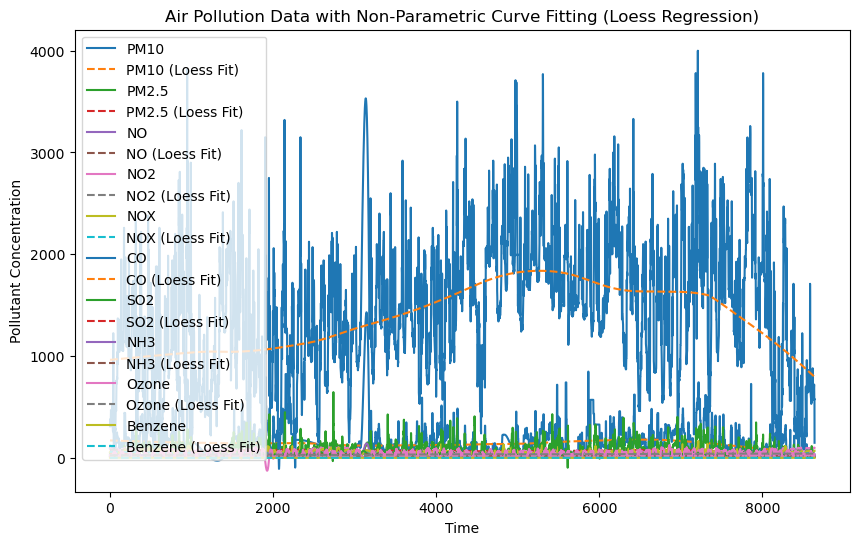

In [14]:
from statsmodels.nonparametric.smoothers_lowess import lowess
# Define the pollutants of interest
pollutants = ['PM10', 'PM2.5', 'NO', 'NO2', 'NOX', 'CO', 'SO2', 'NH3', 'Ozone', 'Benzene']

# Fit a non-parametric curve (loess regression) for each pollutant
curve_data = {}
for pollutant in pollutants:
    x = np.arange(len(df))
    y = df[pollutant].values
    # Set the span parameter for loess regression
    span = 0.3
    # Perform loess regression
    loess_fit = lowess(y, x, frac=span)
    curve_data[pollutant] = loess_fit[:, 1]

# Plot the air pollution data with non-parametric curve fitting
fig, ax = plt.subplots(figsize=(10, 6))
for pollutant in pollutants:
    x = np.arange(len(df))
    y = df[pollutant].values
    loess_fit = curve_data[pollutant]
    ax.plot(x, y, label=pollutant)
    ax.plot(x, loess_fit, '--', label=pollutant + ' (Loess Fit)')

plt.xlabel('Time')
plt.ylabel('Pollutant Concentration')
plt.title('Air Pollution Data with Non-Parametric Curve Fitting (Loess Regression)')
plt.legend()
plt.show()


In this code, the statsmodels.nonparametric.smoothers_lowess module is used to perform loess regression using the lowess() function. The frac parameter specifies the span or fraction of data points to use for each local regression.

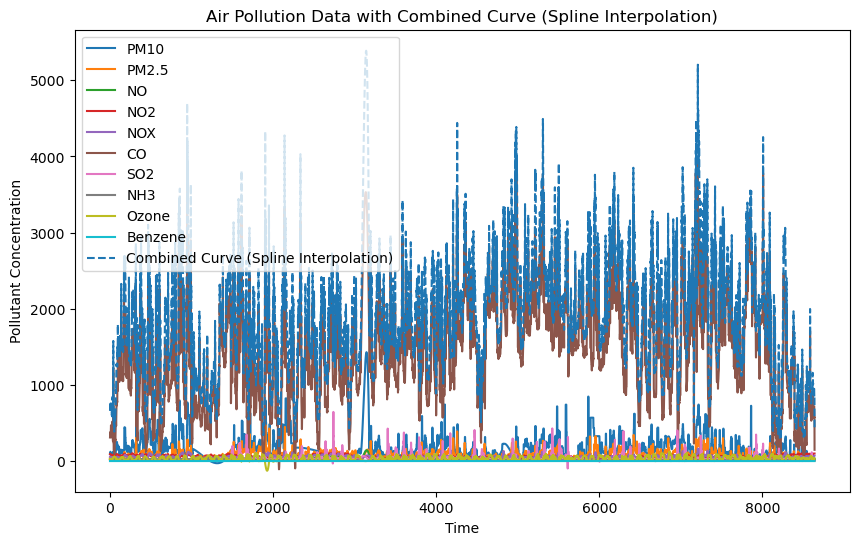

In [15]:
from scipy.interpolate import interp1d
# Define the pollutants of interest
pollutants = ['PM10', 'PM2.5', 'NO', 'NO2', 'NOX', 'CO', 'SO2', 'NH3', 'Ozone', 'Benzene']

# Concatenate the air pollution data into a single curve
x = np.arange(len(df))
y_combined = np.zeros_like(x, dtype=float)  # Initialize as float array
for pollutant in pollutants:
    y = df[pollutant].values
    y_combined += y

# Perform spline interpolation on the combined curve
spline_fit = interp1d(x, y_combined, kind='cubic')

# Plot the air pollution data with combined curve using spline interpolation
fig, ax = plt.subplots(figsize=(10, 6))
for pollutant in pollutants:
    y = df[pollutant].values
    ax.plot(x, y, label=pollutant)

ax.plot(x, spline_fit(x), '--', label='Combined Curve (Spline Interpolation)')

plt.xlabel('Time')
plt.ylabel('Pollutant Concentration')
plt.title('Air Pollution Data with Combined Curve (Spline Interpolation)')
plt.legend()
plt.show()


In this code, the scipy.interpolate.interp1d function is used to perform spline interpolation with the kind='cubic' option specifying cubic spline interpolation.